In [2]:
# VEGETABLE CLASSIFICATTION
#1. PRE-PROCESSING
import cv2,os

data_path='Vegetable Images/train/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
!pip install keras

You should consider upgrading via the 'c:\users\gayur\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\gayur\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import to_categorical

new_target=to_categorical(target)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
# TRAINING THE MODEL
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [9]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(15,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
!pip install sklearn

You should consider upgrading via the 'c:\users\gayur\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [12]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
338/338 [==============================] - ETA: 0s - loss: 2.1414 - accuracy: 0.3120INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


338/338 [==============================] - 1210s 4s/step - loss: 2.1414 - accuracy: 0.3120 - val_loss: 1.7999 - val_accuracy: 0.4507
Epoch 2/20
338/338 [==============================] - ETA: 0s - loss: 1.5360 - accuracy: 0.5284INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


338/338 [==============================] - 1167s 3s/step - loss: 1.5360 - accuracy: 0.5284 - val_loss: 1.3805 - val_accuracy: 0.5696
Epoch 3/20
338/338 [==============================] - ETA: 0s - loss: 1.2146 - accuracy: 0.6256INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


338/338 [==============================] - 1281s 4s/step - loss: 1.2146 - accuracy: 0.6256 - val_loss: 1.2452 - val_accuracy: 0.6185
Epoch 4/20
338/338 [==============================] - ETA: 0s - loss: 1.0142 - accuracy: 0.6832INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


338/338 [==============================] - 1155s 3s/step - loss: 1.0142 - accuracy: 0.6832 - val_loss: 1.0222 - val_accuracy: 0.6837
Epoch 5/20
338/338 [==============================] - ETA: 0s - loss: 0.8481 - accuracy: 0.7358INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


338/338 [==============================] - 455s 1s/step - loss: 0.8481 - accuracy: 0.7358 - val_loss: 0.9467 - val_accuracy: 0.7059
Epoch 6/20
338/338 [==============================] - ETA: 0s - loss: 0.7523 - accuracy: 0.7667INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


338/338 [==============================] - 461s 1s/step - loss: 0.7523 - accuracy: 0.7667 - val_loss: 0.8871 - val_accuracy: 0.7367
Epoch 7/20
338/338 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.7880INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


338/338 [==============================] - 476s 1s/step - loss: 0.6765 - accuracy: 0.7880 - val_loss: 0.8389 - val_accuracy: 0.7452
Epoch 8/20
338/338 [==============================] - ETA: 0s - loss: 0.6035 - accuracy: 0.8122INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


338/338 [==============================] - 490s 1s/step - loss: 0.6035 - accuracy: 0.8122 - val_loss: 0.8012 - val_accuracy: 0.7574
Epoch 9/20
338/338 [==============================] - ETA: 0s - loss: 0.5518 - accuracy: 0.8260INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


338/338 [==============================] - 481s 1s/step - loss: 0.5518 - accuracy: 0.8260 - val_loss: 0.7769 - val_accuracy: 0.7711
Epoch 10/20
338/338 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.8377INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


338/338 [==============================] - 474s 1s/step - loss: 0.5007 - accuracy: 0.8377 - val_loss: 0.7727 - val_accuracy: 0.7778
Epoch 11/20
338/338 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.8606INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


338/338 [==============================] - 468s 1s/step - loss: 0.4378 - accuracy: 0.8606 - val_loss: 0.6985 - val_accuracy: 0.7944
Epoch 12/20
338/338 [==============================] - 467s 1s/step - loss: 0.4145 - accuracy: 0.8659 - val_loss: 0.7705 - val_accuracy: 0.7763
Epoch 13/20
338/338 [==============================] - 463s 1s/step - loss: 0.3938 - accuracy: 0.8738 - val_loss: 0.7173 - val_accuracy: 0.8004
Epoch 14/20
338/338 [==============================] - 446s 1s/step - loss: 0.3744 - accuracy: 0.8806 - val_loss: 0.7035 - val_accuracy: 0.8063
Epoch 15/20
338/338 [==============================] - 415s 1s/step - loss: 0.3556 - accuracy: 0.8831 - val_loss: 0.7850 - val_accuracy: 0.7833
Epoch 16/20
338/338 [==============================] - 633s 2s/step - loss: 0.3376 - accuracy: 0.8901 - val_loss: 0.7287 - val_accuracy: 0.8056
Epoch 17/20
338/338 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8983INFO:tensorflow:Assets written to: model-017.model\a

INFO:tensorflow:Assets written to: model-017.model\assets


338/338 [==============================] - 472s 1s/step - loss: 0.3176 - accuracy: 0.8983 - val_loss: 0.6923 - val_accuracy: 0.8111
Epoch 18/20
338/338 [==============================] - 482s 1s/step - loss: 0.2992 - accuracy: 0.9037 - val_loss: 0.8222 - val_accuracy: 0.7885
Epoch 19/20
338/338 [==============================] - 443s 1s/step - loss: 0.2893 - accuracy: 0.9033 - val_loss: 0.7273 - val_accuracy: 0.8148
Epoch 20/20
338/338 [==============================] - 445s 1s/step - loss: 0.2818 - accuracy: 0.9068 - val_loss: 0.7161 - val_accuracy: 0.8207


In [14]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\gayur\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


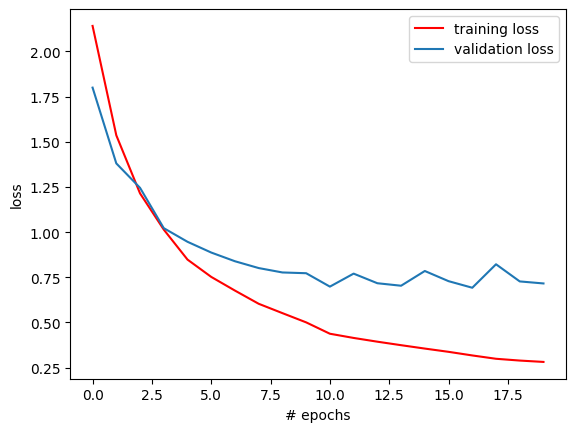

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

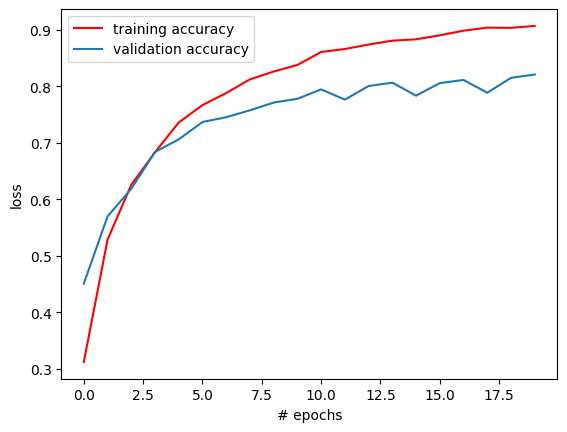

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(test_data,test_target)) # Evaluating the model with train data

47/47 [==============================] - 12s 254ms/step - loss: 0.6560 - accuracy: 0.8180
[0.6560202836990356, 0.8180000185966492]


In [18]:
# TESTING THE MODEL 
from keras.models import load_model
import cv2,os
import numpy as np

In [19]:
model = load_model('model-017.model') # better accuracy model

In [20]:
data_path1='Vegetable Images/test/'
categories1=os.listdir(data_path1)
labels1=[i for i in range(len(categories1))]

label_dict1=dict(zip(categories1,labels1))

In [36]:
img_size=100
test_data=[]
test_target=[]

for category1 in categories1:
  folder_path1=os.path.join(data_path1,category1)
  img_names1=os.listdir(folder_path1)
        
  for img_name1 in img_names1:
   img_path1=os.path.join(folder_path1,img_name1)
   img1=cv2.imread(img_path1)

   try:
            gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized1=cv2.resize(gray1,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            test_data.append(resized1)
            test_target.append(label_dict[category1])
            #appending the image and the label(categorized) into the list (dataset)

   except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [37]:
test_data=np.array(test_data)/255.0
test_data=np.reshape(test_data,(test_data.shape[0],img_size,img_size,1))
test_target=np.array(test_target)

from keras.utils import to_categorical

new_target=to_categorical(test_target)

In [38]:
np.save('test_data',test_data)
np.save('test_target',new_target)

In [39]:
result=model.predict(test_data) #predicting the model with test data

94/94 [==============================] - 24s 258ms/step


In [40]:
print(model.evaluate(test_data,new_target)) 

94/94 [==============================] - 24s 255ms/step - loss: 0.6502 - accuracy: 0.8270
[0.6501598358154297, 0.8270000219345093]


In [48]:
# Preprocessing function
def preprocess(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Coverting the image into gray scale
    resized=cv2.resize(gray,(img_size,img_size))#resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    return reshaped

1/1 [==============================] - 0s 48ms/step


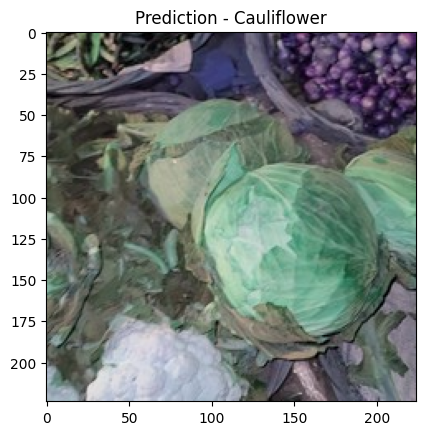

In [63]:
# VALIDATING WITH A NEW IMAGE
category_val={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"}
datapath='Vegetable Images/validation/Cabbage/1212.jpg'
img=cv2.imread(datapath)
input=preprocess(img) #preprocessing
pred=model.predict(input)
index = np.argmax(pred)
plt.title("Prediction - {}".format(category_val[index]))
plt.imshow(img)   